# Training Scikit-Learn with a Synthetic dataset

In [1]:
import numpy as np
import pylab as pl

In [3]:
features = np.loadtxt('CollML_testdataset_features.dat')
labels   = np.loadtxt('CollML_testdataset_labels.dat')

In [4]:
print("Shape of features", features.shape)
print("Shape of labels", labels.shape)

Shape of features (500, 2)
Shape of labels (500,)


In [6]:
np.unique(labels)   ## shows unique values in an array

array([ 0.,  1.])

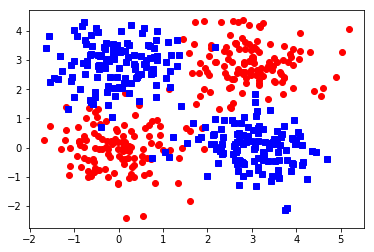

In [7]:
# plot first feature
pl.plot( features[ labels == 0, 0 ], features[ labels == 0, 1 ], 'ro'  )
# plot second feature
pl.plot( features[ labels == 1, 0 ], features[ labels == 1, 1 ], 'bs'  )
pl.show()

In [8]:
from sklearn.tree import DecisionTreeClassifier
# clf is the classifier
clf = DecisionTreeClassifier()

In [9]:
# fit features with classifier
clf.fit(features, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
# check accuracy
clf.score(features, labels)

1.0

In [12]:
from sklearn.tree import export_graphviz
# export file to visualize classifier decision tree
export_graphviz(clf, 'Graph_DecisionTree_testdataset.dat')
# can be visualized at webgraphviz.com

In [13]:
# evaluate importance index for each feature for how much it contributed to the overall classification
clf.feature_importances_
# the first feature contributes more than the second 

array([ 0.63343888,  0.36656112])

In [14]:
# predict the class of new samples based on coordinates
P1 = np.array([[-1,-1]])
P2 = np.array([[-1,4]])

print("Prediction for P1: ", clf.predict(P1))
print("Prediction for P2: ", clf.predict(P2))

Prediction for P1:  [ 0.]
Prediction for P2:  [ 1.]


In [16]:
# estimate the probability of belonging to a class based on coordinates
print("Probability for P1: ", clf.predict_proba(P1))
print("Probability for P2: ", clf.predict_proba(P2))

Probability for P1:  [[ 1.  0.]]
Probability for P2:  [[ 0.  1.]]


Tip: Checking probability in areas of overlap between the two classes is a good way to check for overfitting

Now, we will draw the decision boundary between the two classes. We will do this by making a prediction for every point in the X1-X2 plane. 

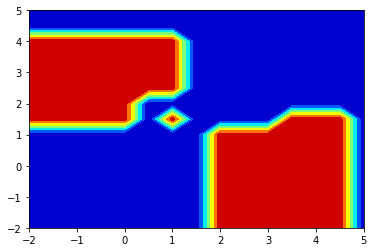

In [17]:
from matplotlib import mlab, cm

# delta defines how "fine" our grid is
delta = 0.5
x     = np.arange(-2.0, 5.001, delta)
y     = np.arange(-2.0, 5.001, delta)

# find predictions by coordinates
X, Y = np.meshgrid(x, y)
Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
Z    = Z.reshape( X.shape )

# plot contour plot
cset1 = pl.contourf( X, Y, Z, cmap=pl.get_cmap('jet'))
pl.xlim(-2, 5)
pl.ylim(-2, 5)

pl.show()

Changing delta to a smaller value:

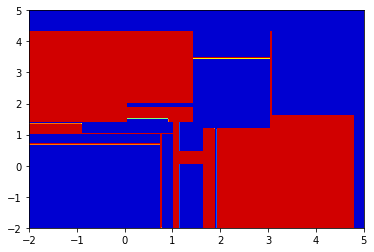

In [18]:
from matplotlib import mlab, cm

# delta is now much smaller
delta = 0.01
x     = np.arange(-2.0, 5.001, delta)
y     = np.arange(-2.0, 5.001, delta)

# find predictions by coordinates
X, Y = np.meshgrid(x, y)
Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
Z    = Z.reshape( X.shape )

# plot contour plot
cset1 = pl.contourf( X, Y, Z, cmap=pl.get_cmap('jet'))
pl.xlim(-2, 5)
pl.ylim(-2, 5)

pl.show()

A delta that is too small can cause the noise to drive decisions and  results in overfitting

Restricting the the decision tree can prevent overfitting:

In [19]:
# the max depth has been restricted to 5
clf = DecisionTreeClassifier( max_depth = 5 )
clf.fit( features, labels )
print( clf.score( features, labels ) )
export_graphviz( clf, 'Graph_DecisionTree_testdataset_2.dat' )
# visualize at webgraphviz

0.966


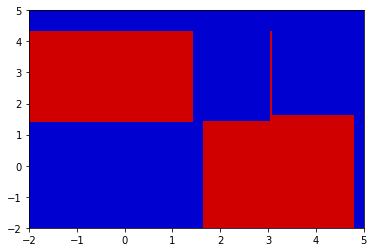

In [20]:
# plot new decision boundary

from matplotlib import mlab, cm

delta = 0.01
x     = np.arange(-2.0, 5.001, delta)
y     = np.arange(-2.0, 5.001, delta)

X, Y = np.meshgrid(x, y)
Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
Z    = Z.reshape( X.shape )

cset1 = pl.contourf( X, Y, Z, cmap=pl.get_cmap('jet'))
pl.xlim(-2, 5)
pl.ylim(-2, 5)

pl.show()

# Random Forests with Scikit-Learn
A random forest is an ensemble of decision trees, each only having access to only partial information about the dataset. They use random subsampling by a bagging procedure (or bootstrap aggregation). Out-of-the-bag error can be calculated for each classifier in the ensemble by using datapoints not considered during the training. 

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
clf = RandomForestClassifier( n_estimators = 50, oob_score = True )
clf.fit(features, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [23]:
clf.score(features, labels)

1.0

In [24]:
clf.feature_importances_

array([ 0.4678439,  0.5321561])

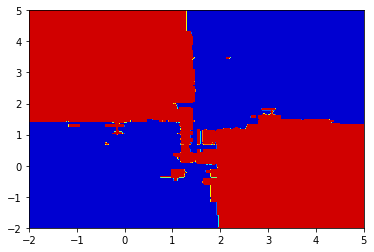

In [25]:
# find the decision boundary
from matplotlib import mlab, cm

delta = 0.01
x     = np.arange(-2.0, 5.001, delta)
y     = np.arange(-2.0, 5.001, delta)

X, Y = np.meshgrid(x, y)
Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
Z    = Z.reshape( X.shape )

cset1 = pl.contourf( X, Y, Z, cmap=pl.get_cmap('jet'))
pl.xlim(-2, 5)
pl.ylim(-2, 5)

pl.show()

# Adaboosting
Short for adaptive boosting. It works by fitting an initial tree and then add more trees, paying more attention to samples that the first trees were not able to classify. 

In [29]:
# import AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

# model with just 5 estimators
clf = AdaBoostClassifier(n_estimators = 5)
clf.fit(features, labels)
print(clf.score(features, labels))

# model with 200 estimators
clf = AdaBoostClassifier(n_estimators = 200)
clf.fit(features, labels)
print(clf.score(features, labels))

0.518
0.776


The accuracy improves with increasing the number of estimators

In [31]:
# change learning rates; default was 1

# learning rate of 0.5
clf = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.5)
clf.fit(features, labels)
print(clf.score(features, labels))

# learning rate of 0.1
clf = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.1)
clf.fit(features, labels)
print(clf.score(features, labels))

0.736
0.63


Decreasing learning rate decreases accuracy

# Evaluating the Performance of Classifiers

Evuluate the performance of random forest for the following measures of performance:

$\text{Accuracy} = \frac{\text{(# true positives) + (# true negatives)}}{\text{total}}$

$\text{Precision} = \frac{\text{(# true positives)}}{\text{(# true positives) + (# false positives)}}$

$\text{Recall} = \frac{\text{(# true positives)}}{\text{(# true positives) + (# false negatives)}}$

$\text{F1-score} = \frac{2*\text{precision * recall}}{\text{precision + recall}}$

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
clf = RandomForestClassifier( n_estimators = 2 )
clf.fit( features, labels )

print("Accuracy: ", accuracy_score(labels, clf.predict(features)))
print("Precision: ", precision_score(labels, clf.predict(features)))
print("Recall: ", recall_score(labels, clf.predict(features)))
print("F1-score: ", f1_score(labels, clf.predict(features)))

Accuracy:  0.974
Precision:  1.0
Recall:  0.948
F1-score:  0.973305954825


# Support Vector Machines with Scikit-Learn
A support vector machine (SVM) model is a representation of the examples as points in space, mapped so that the examples of separate categories are divided by a clear gap that is as wide as possible. C is the penalty for each misclassified point; soft margins allow for more misclassifications. By default, Scikit-Learn uses Radial Basis Functions (gaussian) as SVM kernels. Gamma is the inverse of the variance in a gaussian distribution, so gamma renders a smoother decision boundary. 

In [37]:
# create an SVM and fit the data
from sklearn.svm import SVC
clf = SVC()
clf.fit(features, labels)
print(clf.score(features, labels))

0.96


In [38]:
# try a large gamma
from sklearn.svm import SVC
clf = SVC(gamma = 10000)
clf.fit(features, labels)
print(clf.score(features, labels))

1.0


Now we are going to test different values of gamma and C on the decision boundaries. This plot function will make it easy to plot decision boundaries for SVMs with different parameters:

In [39]:
# function that draws decision boundaries 
def plotContours(clf, figname, delta = 0.01):
    
    x     = np.arange(-2.0, 5.001, delta)
    y     = np.arange(-2.0, 5.001, delta)

    X, Y = np.meshgrid(x, y)
    Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
    Z    = Z.reshape( X.shape )

    cset1 = pl.contourf( X, Y, Z, cmap=pl.get_cmap('jet'))
    pl.xlim(-2, 5)
    pl.ylim(-2, 5)

    pl.xlabel('X1')
    pl.ylabel('X2')

    pl.tight_layout()
    pl.savefig(figname, dpi=500)
    pl.show()
    
    return

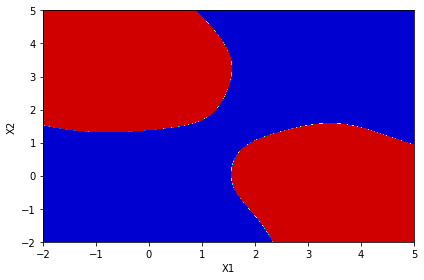

In [40]:
# descision boundaries with default gamma and C
# documentation states that if gamma is 'auto' then 1/n features are used instead
# default C = 1
clf = SVC()
clf.fit(features, labels)
plotContours(clf, 'test_default.png')

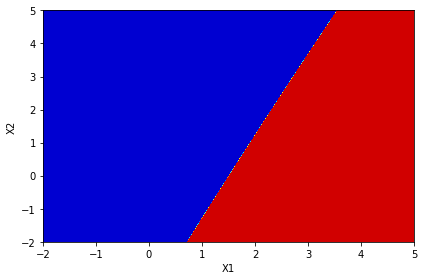

In [51]:
# descision boundaries with a very small gamma
clf = SVC(gamma = 0.00001)
clf.fit(features, labels)
plotContours(clf, 'test_default.png')

A small gamma results in underfitting

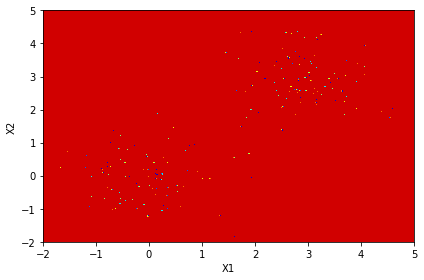

In [49]:
# descision boundaries with a very large gamma
clf = SVC(gamma = 10000)
clf.fit(features, labels)
plotContours(clf, 'test_default.png')

A very large gamma causes overfitting and the model fits individual points

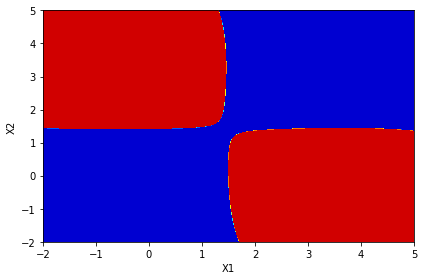

In [52]:
# descision boundaries with small C
clf = SVC(C = 0.0001)
clf.fit(features, labels)
plotContours(clf, 'test_default.png')

A small C is more conservative in fitting classes

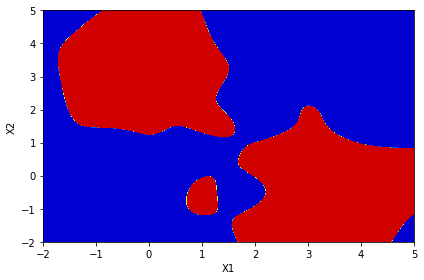

In [48]:
# descision boundaries with large C
clf = SVC(C = 10000)
clf.fit(features, labels)
plotContours(clf, 'test_default.png')

A large C is less conservative and results in overfitting

To find ideal values of C and gamma, you should compare scores

In [53]:
# good combination of C and gamma
clf = SVC(C = 100, gamma = 0.01)
clf.fit(features, labels)
clf.score(features, labels)

0.95199999999999996

# Overfitting and Cross-Validation 
Train-test split: split your dataset into a Training Dataset and a Testing Dataset. 

In [54]:
from sklearn.model_selection import train_test_split

# assign features to variables
# train variables are for training
# test variables are for assessing peformance
X_train, X_test, Y_train, Y_test = train_test_split( features, labels, test_size=0.33)

In [55]:
print("Shape of the train dataset: ", X_train.shape)
print("Shape of the test dataset: ", X_test.shape)

Shape of the train dataset:  (335, 2)
Shape of the test dataset:  (165, 2)


In [60]:
# apply test-split to SVM model
clf = SVC( C = 0.001, gamma = 10. )
clf.fit( X_train, Y_train )
print("Accuracy of the classifier on the test dataset: ", clf.score(X_test, Y_test))

Accuracy of the classifier on the test dataset:  0.460606060606


Find the correct performance as a function of gamma:

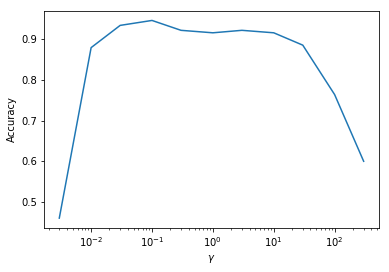

In [61]:
# put gamma values in an array
setGammas = np.array( [0.003,0.01,0.03,0.1,0.3,1.0,3.,10.,30.,100.,300] )

# initialize array for accuracies
accuracies = []
# iterate through gamma values and find accuracies for SVM model fits at each gamma
# calculate accuracy for each gamma
for gamma in setGammas:
    clf = SVC( C = 1., gamma = gamma )
    clf.fit( X_train, Y_train )
    accuracies.append( clf.score(X_test, Y_test) )

pl.plot(setGammas, accuracies)

pl.ylabel(r'Accuracy')
pl.xlabel(r'$\gamma$')
# visualize plot on a log-scale
pl.xscale('log')

pl.savefig('SVM_accuracyvsgamma_syntheticdata.png', dpi=500)
pl.show()

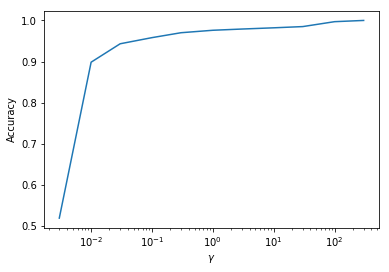

In [63]:
# assesing accuracies with traing set to show performance without cross-validation 
# put gamma values in an array
setGammas = np.array( [0.003,0.01,0.03,0.1,0.3,1.0,3.,10.,30.,100.,300] )

# initialize array for accuracies
accuracies = []
# iterate through gamma values and find accuracies for SVM model fits at each gamma
# calculate accuracy for each gamma
for gamma in setGammas:
    clf = SVC( C = 1., gamma = gamma )
    clf.fit( X_train, Y_train )
    accuracies.append( clf.score(X_train, Y_train) )

pl.plot(setGammas, accuracies)

pl.ylabel(r'Accuracy')
pl.xlabel(r'$\gamma$')
# visualize plot on a log-scale
pl.xscale('log')

pl.savefig('SVM_accuracyvsgamma_syntheticdata.png', dpi=500)
pl.show()

Without cross-validation, accuracy reaches saturation because the model is familiar with the training dataset. 

Comparing two different gammas to estimate the accuracy:

In [64]:
numRepetitions = 100
accuracies = np.zeros( numRepetitions )

for j in range(numRepetitions):
    X_train, X_test, Y_train, Y_test = train_test_split( features, labels, 
                                                            test_size=0.33)
    clf = SVC( C = 1., gamma = 0.5 )
    clf.fit( X_train, Y_train )
    accuracies[j] = clf.score(X_test, Y_test)

print(r"Average accuracy (gamma = 0.5): ", accuracies.mean() )


for j in range(numRepetitions):
    X_train, X_test, Y_train, Y_test = train_test_split( features, labels,
                                                            test_size=0.33)
    clf = SVC( C = 1., gamma = 100. )
    clf.fit( X_train, Y_train )
    accuracies[j] = clf.score(X_test, Y_test)

print("Average accuracy (gamma = 100.): ", accuracies.mean() )

Average accuracy (gamma = 0.5):  0.950727272727
Average accuracy (gamma = 100.):  0.800848484848


Metaparameter fitting: optimizing the metaparameter of your model. This methodology can be used to fit the best C and gamma to the data. Ideally you should generate N repeated randomly shuffled versions of the train-test split and average their accuracies. 

# K-fold Cross Validation
Generates N repeated randomly shuffled versions of the train-test split and reports their accuracies. 

Appy K-fold to the synthetic data:

In [65]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4)

for train_index, test_index in kf.split( features ):
    X_train = features[train_index]
    X_test  = features[test_index]
    Y_train = labels[train_index]
    Y_test  = labels[test_index]
    
    clf = SVC( C = 1., gamma = 100. )
    clf.fit( X_train, Y_train )
    print( clf.score(X_test, Y_test) )

0.824
0.84
0.816
0.776


In [67]:
# try a "good" combination of C and gamma

from sklearn.model_selection import KFold
kf = KFold(n_splits=4)

for train_index, test_index in kf.split( features ):
    X_train = features[train_index]
    X_test  = features[test_index]
    Y_train = labels[train_index]
    Y_test  = labels[test_index]
    
    clf = SVC( C = 1., gamma = 0.5 )
    clf.fit( X_train, Y_train )
    print( clf.score(X_test, Y_test) )

0.936
0.96
0.936
0.96


Confirms that the model works well in all 4 instances